# **Stock Price Forecasting Using LSTM and GRU**

#### **Introduction**

In [52]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
#from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

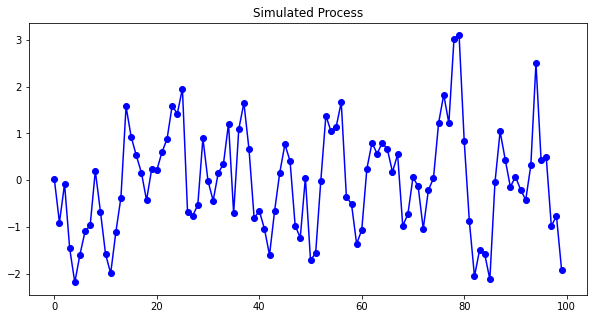

In [53]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
#from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Generate the data
import numpy as np
ar = np.array([1, -0.8, 0.2])
ma = np.array([1])
my_simulation = ArmaProcess(ar, ma).generate_sample(nsample=100)

plt.figure(figsize=[10, 5]); # Set dimensions for figure
plt.plot(my_simulation, linestyle='-', marker='o', color='b')
plt.title("Simulated Process")
plt.show()

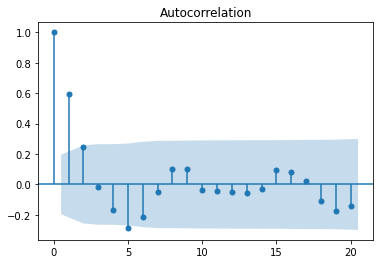

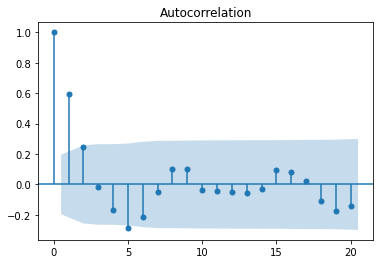

In [54]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
plot_acf(my_simulation)

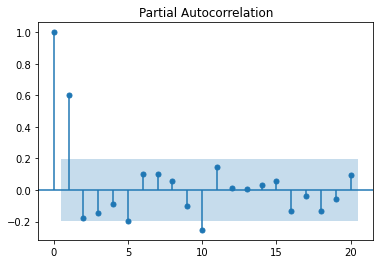

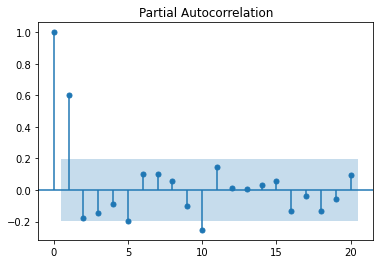

In [55]:
plot_pacf(my_simulation)

In [56]:
import warnings
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA

mod = sm.tsa.arima.ARIMA(my_simulation, order=(2, 0, 0))
mod_fit = mod.fit()
print(mod_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -129.227
Date:                Wed, 10 Aug 2022   AIC                            266.454
Time:                        16:00:31   BIC                            276.874
Sample:                             0   HQIC                           270.671
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0490      0.196     -0.249      0.803      -0.434       0.336
ar.L1          0.7186      0.103      7.001      0.000       0.517       0.920
ar.L2         -0.1845      0.102     -1.805      0.0

In [57]:
array = np.random.random(20) #.astype(np.float32
array.reshape((1,20,1))
array

array([0.07164809, 0.24578406, 0.48148255, 0.61118398, 0.17452963,
       0.74914458, 0.03176746, 0.75972416, 0.02384512, 0.20218889,
       0.4589484 , 0.94949183, 0.60985144, 0.84240712, 0.5906903 ,
       0.29999618, 0.05326773, 0.36646999, 0.972074  , 0.11603996])

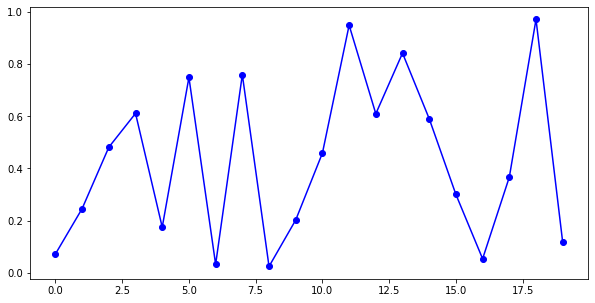

In [58]:
plt.figure(figsize=[10, 5]); # Set dimensions for figure
plt.plot(array, linestyle='-', marker='o', color='b')
plt.show()

In [59]:
array.reshape((4,5,1))

array([[[0.07164809],
        [0.24578406],
        [0.48148255],
        [0.61118398],
        [0.17452963]],

       [[0.74914458],
        [0.03176746],
        [0.75972416],
        [0.02384512],
        [0.20218889]],

       [[0.4589484 ],
        [0.94949183],
        [0.60985144],
        [0.84240712],
        [0.5906903 ]],

       [[0.29999618],
        [0.05326773],
        [0.36646999],
        [0.972074  ],
        [0.11603996]]])

In [60]:

array.reshape((2,5,2))

array([[[0.07164809, 0.24578406],
        [0.48148255, 0.61118398],
        [0.17452963, 0.74914458],
        [0.03176746, 0.75972416],
        [0.02384512, 0.20218889]],

       [[0.4589484 , 0.94949183],
        [0.60985144, 0.84240712],
        [0.5906903 , 0.29999618],
        [0.05326773, 0.36646999],
        [0.972074  , 0.11603996]]])

In [61]:
# Example 1
array = np.random.random(20) #.astype(np.float32
array.reshape((1,20,1))

# Example 2
array.reshape((4,5,1))

# Example 3
array.reshape((2,5,2))

array([[[0.644162  , 0.62018174],
        [0.78509726, 0.89561899],
        [0.91356572, 0.19793648],
        [0.60178552, 0.33986856],
        [0.03955081, 0.90161515]],

       [[0.54357596, 0.75934626],
        [0.53348311, 0.28271695],
        [0.18985805, 0.53849939],
        [0.2756614 , 0.18892436],
        [0.59038536, 0.73189572]]])

In [62]:
# IF it is image data:
# Create an RGB image that is 3 dimensional arrays of 8-bit unsigned integers.
width = 5
height = 4
RGB = 3
p = width * height * RGB
img_data = np.random.randint(100,high=255, size=p, dtype=np.uint8) # Generate values in (100,255)
img_data = img_data.reshape((height, width, RGB))
img_data

array([[[113, 177, 242],
        [220, 215, 151],
        [241, 217, 146],
        [152, 120, 229],
        [120, 227, 244]],

       [[220, 242, 187],
        [219, 116, 201],
        [168, 135, 106],
        [141, 182, 225],
        [182, 203, 178]],

       [[244, 222, 179],
        [101, 175, 220],
        [248, 215, 103],
        [123, 150, 148],
        [159, 229, 215]],

       [[187, 191, 223],
        [167, 161, 148],
        [194, 206, 107],
        [122, 203, 119],
        [223, 174, 161]]], dtype=uint8)

In [63]:
from PIL import Image
img = Image.fromarray( img_data)
img.show()

# **Importing Data**

In [64]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
AMZN = yf.download('AMZN', 
                      start='2013-01-01', 
                      end='2022-08-09', 
                      progress=False)
# AMZN = yf.download('AMZN') for all 
all_data = AMZN[['Adj Close','Open', 'High', 'Low', 'Close', 'Volume']].round(2)


In [65]:
all_data.head(10)

,Adj Close,Open,High,Low,Close,Volume
Date,,,,,,
2012-12-31,12.54,12.19,12.62,12.14,12.54,68380000
2013-01-02,12.87,12.80,12.90,12.66,12.87,65420000
2013-01-03,12.92,12.86,13.04,12.82,12.92,55018000
2013-01-04,12.96,12.88,12.99,12.83,12.96,37484000
2013-01-07,13.42,13.15,13.49,13.13,13.42,98200000
2013-01-08,13.32,13.35,13.45,13.18,13.32,60214000
2013-01-09,13.32,13.41,13.48,13.27,13.32,45312000
2013-01-10,13.27,13.43,13.44,13.11,13.27,57268000
2013-01-11,13.40,13.26,13.42,13.21,13.40,48266000


In [66]:
all_data.tail()

,Adj Close,Open,High,Low,Close,Volume
Date,,,,,,
2022-08-02,134.16,134.72,137.44,134.09,134.16,61922400
2022-08-03,139.52,136.21,140.49,136.05,139.52,71827800
2022-08-04,142.57,140.58,143.56,139.55,142.57,70585000
2022-08-05,140.80,140.10,142.86,139.60,140.80,50650100
2022-08-08,139.41,142.05,144.23,138.29,139.41,52229000


In [67]:
all_data.shape

(2418, 6)

In [68]:
all_data.columns

Index(['Adj Close', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

#### **Let's Understand More About The Data**

In [69]:
all_data.duplicated()

Date
2012-12-31    False
2013-01-02    False
2013-01-03    False
2013-01-04    False
2013-01-07    False
              ...  
2022-08-02    False
2022-08-03    False
2022-08-04    False
2022-08-05    False
2022-08-08    False
Length: 2418, dtype: bool

In [70]:
all_data.duplicated().sum()

0

In [71]:
#Getting all the columns
print("Features of the dataset:")
all_data.columns

Features of the dataset:


Index(['Adj Close', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [72]:
#check details about the data set
print('Here is the information regarding the dataset :')
all_data.info()

Here is the information regarding the dataset :
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2418 entries, 2012-12-31 to 2022-08-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  2418 non-null   float64
 1   Open       2418 non-null   float64
 2   High       2418 non-null   float64
 3   Low        2418 non-null   float64
 4   Close      2418 non-null   float64
 5   Volume     2418 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 132.2 KB


In [73]:
#print the unique value
print('Here is the unique values in our dataset')
all_data.nunique()

Here is the unique values in our dataset


Adj Close    2042
Open         2000
High         2038
Low          2070
Close        2042
Volume       2371
dtype: int64

In [74]:
#printign the data types of our data
print('Here is the data types of the dataset :')
all_data.dtypes

Here is the data types of the dataset :


Adj Close    float64
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
dtype: object

In [75]:
#Looking for the description of the dataset to get insights of the data
all_data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Adj Close,2418.0,7.222937e+01,5.372451e+01,12.41,2.147500e+01,5.125000e+01,1.006475e+02,1.865700e+02
Open,2418.0,7.225963e+01,5.377569e+01,12.19,2.148250e+01,5.100500e+01,1.012350e+02,1.872000e+02
High,2418.0,7.306440e+01,5.442397e+01,12.62,2.162750e+01,5.144500e+01,1.020050e+02,1.886500e+02
Low,2418.0,7.136578e+01,5.305383e+01,12.14,2.131000e+01,5.043000e+01,1.001625e+02,1.848400e+02
Close,2418.0,7.222937e+01,5.372451e+01,12.41,2.147500e+01,5.125000e+01,1.006475e+02,1.865700e+02
Volume,2418.0,8.069181e+07,4.263939e+07,17626000.00,5.377100e+07,6.909700e+07,9.354250e+07,4.771220e+08


In [76]:
#check for count of missing values in each column.
print('Here are the details of missing value details in our dataet:')
all_data.isna().sum()
all_data.isnull().sum()

Here are the details of missing value details in our dataet:


Adj Close    0
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


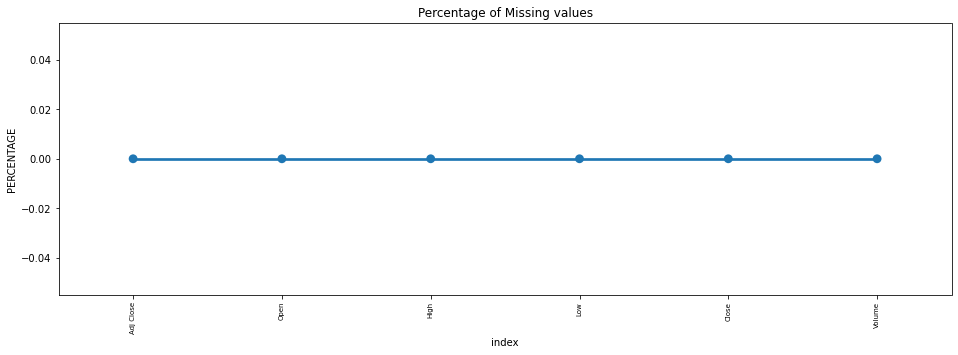

In [77]:
import seaborn as sns
missing = pd.DataFrame((all_data.isnull().sum())*100/all_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

<AxesSubplot:xlabel='Date'>

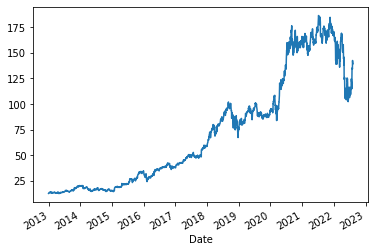

In [78]:
all_data['Close'].plot()

<AxesSubplot:xlabel='Date'>

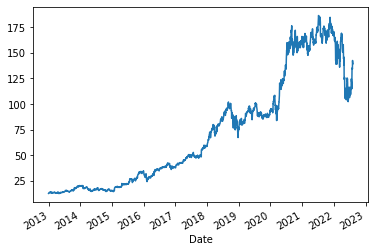

In [79]:
new_var = all_data['Adj Close'].plot()
new_var

<AxesSubplot:xlabel='Date'>

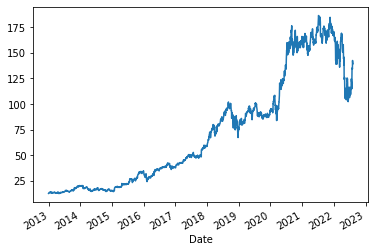

In [80]:
all_data['Adj Close'].plot()

<AxesSubplot:xlabel='Open', ylabel='count'>

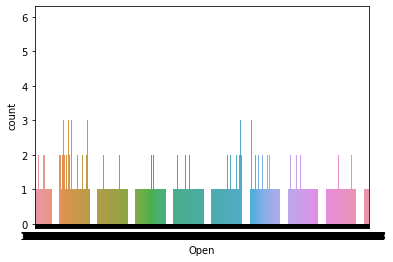

In [98]:
sns.countplot(x=all_data.Open)

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

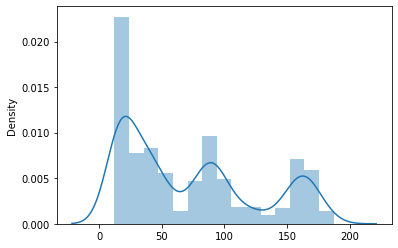

In [100]:
sns.distplot(x=all_data.Open)

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

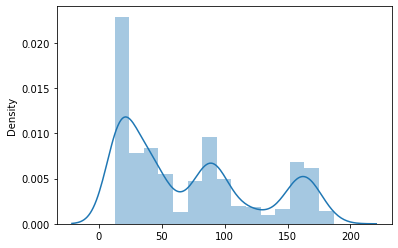

In [101]:
sns.distplot(x=all_data.Close)

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

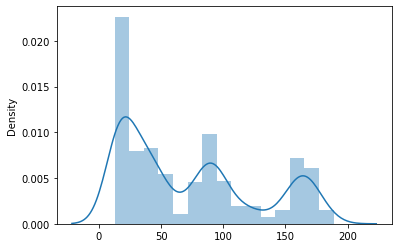

In [102]:
sns.distplot(x=all_data.High)

In [ ]:
sns.distplot(x=all_data.Close)

In [81]:
print("There are "+ str(all_data[:'2020'].shape[0]) + " observations in the training data")
print("There are "+ str(all_data['2021':].shape[0]) + " observations in the test data")

There are 2016 observations in the training data
There are 402 observations in the test data


In [82]:
def ts_train_test(all_data,time_steps,for_periods):
    '''
    input: 
      data: dataframe with dates and price data
    output:
      X_train, y_train: data from 2013/1/1-2020/12/31
      X_test:  data from 2021 -
      sc:      insantiated MinMaxScaler object fit to the training data
    '''
    # create training and test set
    ts_train = all_data[:'2020'].iloc[:,0:1].values
    ts_test  = all_data['2021':].iloc[:,0:1].values
    ts_train_len = len(ts_train)
    ts_test_len = len(ts_test)

    # create training data of s samples and t time steps
    X_train = []
    y_train = []
    y_train_stacked = []
    for i in range(time_steps,ts_train_len-1): 
        X_train.append(ts_train[i-time_steps:i,0])
        y_train.append(ts_train[i:i+for_periods,0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshaping X_train for efficient modelling
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

    inputs = pd.concat((all_data["Adj Close"][:'2020'], all_data["Adj Close"]['2021':]),axis=0).values
    inputs = inputs[len(inputs)-len(ts_test) - time_steps:]
    inputs = inputs.reshape(-1,1)

    # Preparing X_test
    X_test = []
    for i in range(time_steps,ts_test_len+time_steps-for_periods):
        X_test.append(inputs[i-time_steps:i,0])
        
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

    return X_train, y_train , X_test

X_train, y_train, X_test = ts_train_test(all_data,5,2)
X_train.shape[0],X_train.shape[1]

(2010, 5)

In [83]:
# Make the 3-D shape to a data frame so we can see: 
X_train_see = pd.DataFrame(np.reshape(X_train, (X_train.shape[0],X_train.shape[1])))
y_train_see = pd.DataFrame(y_train)
pd.concat([X_train_see,y_train_see],axis=1)

,0,1,2,3,4,0,1
0,12.54,12.87,12.92,12.96,13.42,13.32,13.32
1,12.87,12.92,12.96,13.42,13.32,13.32,13.27
2,12.92,12.96,13.42,13.32,13.32,13.27,13.40
3,12.96,13.42,13.32,13.32,13.27,13.40,13.64
4,13.42,13.32,13.32,13.27,13.40,13.64,13.60
...,...,...,...,...,...,...,...
2005,162.05,161.80,160.08,160.31,160.33,159.26,158.63
2006,161.80,160.08,160.31,160.33,159.26,158.63,164.20
2007,160.08,160.31,160.33,159.26,158.63,164.20,166.10
2008,160.31,160.33,159.26,158.63,164.20,166.10,164.29


In [84]:
# Make the 3-D shape to a data frame so we can see: 
X_test_see = pd.DataFrame(np.reshape(X_test, (X_test.shape[0],X_test.shape[1])))
pd.DataFrame(X_test_see)

,0,1,2,3,4
0,158.63,164.20,166.10,164.29,162.85
1,164.20,166.10,164.29,162.85,159.33
2,166.10,164.29,162.85,159.33,160.93
3,164.29,162.85,159.33,160.93,156.92
4,162.85,159.33,160.93,156.92,158.11
...,...,...,...,...,...
395,122.42,121.14,114.81,120.97,122.28
396,121.14,114.81,120.97,122.28,134.95
397,114.81,120.97,122.28,134.95,135.39
398,120.97,122.28,134.95,135.39,134.16


In [85]:
print("There are " + str(X_train.shape[0]) + " samples in the training data")
print("There are " + str(X_test.shape[0]) + " samples in the test data")

There are 2010 samples in the training data
There are 400 samples in the test data


In [86]:
def simple_rnn_model(X_train, y_train, X_test):
    '''
    create single layer rnn model trained on X_train and y_train
    and make predictions on the X_test data
    '''
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN
    
    my_rnn_model = Sequential()
    my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    #my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    #my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    my_rnn_model.add(SimpleRNN(32))
    my_rnn_model.add(Dense(2)) # The time step of the output

    my_rnn_model.compile(optimizer='rmsprop', loss='mean_squared_error')

    # fit the RNN model
    my_rnn_model.fit(X_train, y_train, epochs=100, batch_size=150, verbose=0)

    # Finalizing predictions
    rnn_predictions = my_rnn_model.predict(X_test)

    return my_rnn_model, rnn_predictions

my_rnn_model, rnn_predictions = simple_rnn_model(X_train, y_train, X_test)
rnn_predictions[1:10]

array([[50.59346 , 48.53223 ],
       [50.59346 , 48.53223 ],
       [50.59346 , 48.53223 ],
       [50.593456, 48.53223 ],
       [50.593456, 48.53223 ],
       [50.593456, 48.53223 ],
       [50.59346 , 48.53223 ],
       [50.593456, 48.53223 ],
       [50.59346 , 48.53223 ]], dtype=float32)

(11513.027, <AxesSubplot:xlabel='Date'>)

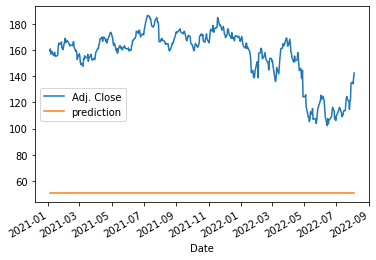

In [87]:
def actual_pred_plot(preds):
    actual_pred = pd.DataFrame(columns = ['Adj. Close', 'prediction'])
    actual_pred['Adj. Close'] = all_data.loc['2021':,'Adj Close'][0:len(preds)]
    actual_pred['prediction'] = preds[:,0]

    from keras.metrics import MeanSquaredError
    m = MeanSquaredError()
    m.update_state(np.array(actual_pred['Adj. Close']),np.array(actual_pred['prediction']))
    
    return (m.result().numpy(), actual_pred.plot() )
    
actual_pred_plot(rnn_predictions)  

(77.45279, <AxesSubplot:xlabel='Date'>)

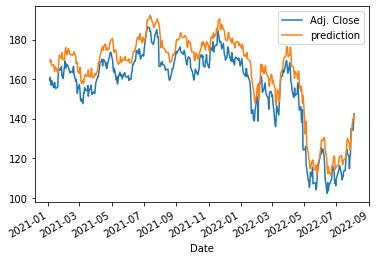

In [88]:
def ts_train_test_normalize(all_data,time_steps,for_periods):
    '''
    input: 
      data: dataframe with dates and price data
    output:
      X_train, y_train: data from 2013/1/1-2020/12/31
      X_test:  data from 2021 -
      sc:      insantiated MinMaxScaler object fit to the training data
    '''
    # create training and test set
    ts_train = all_data[:'2020'].iloc[:,0:1].values
    ts_test  = all_data['2021':].iloc[:,0:1].values
    ts_train_len = len(ts_train)
    ts_test_len = len(ts_test)

    # scale the data
    from sklearn.preprocessing import MinMaxScaler
    sc = MinMaxScaler(feature_range=(0,1))
    ts_train_scaled = sc.fit_transform(ts_train)

    # create training data of s samples and t time steps
    X_train = []
    y_train = []
    y_train_stacked = []
    for i in range(time_steps,ts_train_len-1): 
        X_train.append(ts_train_scaled[i-time_steps:i,0])
        y_train.append(ts_train_scaled[i:i+for_periods,0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshaping X_train for efficient modelling
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

    inputs = pd.concat((all_data["Adj Close"][:'2020'], all_data["Adj Close"]['2021':]),axis=0).values
    inputs = inputs[len(inputs)-len(ts_test) - time_steps:]
    inputs = inputs.reshape(-1,1)
    inputs  = sc.transform(inputs)

    # Preparing X_test
    X_test = []
    for i in range(time_steps,ts_test_len+time_steps-for_periods):
        X_test.append(inputs[i-time_steps:i,0])
        
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

    return X_train, y_train , X_test, sc

def simple_rnn_model(X_train, y_train, X_test, sc):
    '''
    create single layer rnn model trained on X_train and y_train
    and make predictions on the X_test data
    '''
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN
    
    my_rnn_model = Sequential()
    my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    #my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    #my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    my_rnn_model.add(SimpleRNN(32))
    my_rnn_model.add(Dense(2)) # The time step of the output

    my_rnn_model.compile(optimizer='rmsprop', loss='mean_squared_error')

    # fit the RNN model
    my_rnn_model.fit(X_train, y_train, epochs=100, batch_size=150, verbose=0)

    # Finalizing predictions
    rnn_predictions = my_rnn_model.predict(X_test)
    from sklearn.preprocessing import MinMaxScaler
    rnn_predictions = sc.inverse_transform(rnn_predictions)

    return my_rnn_model, rnn_predictions


X_train, y_train, X_test, sc = ts_train_test_normalize(all_data,5,2)
my_rnn_model, rnn_predictions_2 = simple_rnn_model(X_train, y_train, X_test, sc)
rnn_predictions_2[1:10]
actual_pred_plot(rnn_predictions_2)   

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


(51.000744, <AxesSubplot:xlabel='Date'>)

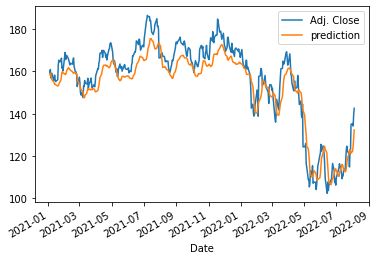

In [89]:
def LSTM_model(X_train, y_train, X_test, sc):
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU, LSTM
    from tensorflow.keras.optimizers import SGD
    
    # The LSTM architecture
    my_LSTM_model = Sequential()
    my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_LSTM_model.add(LSTM(units=50, activation='tanh'))
    my_LSTM_model.add(Dense(units=2))

    # Compiling
    my_LSTM_model.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
    # Fitting to the training set
    my_LSTM_model.fit(X_train,y_train,epochs=50,batch_size=150, verbose=0)

    LSTM_prediction = my_LSTM_model.predict(X_test)
    LSTM_prediction = sc.inverse_transform(LSTM_prediction)

    return my_LSTM_model, LSTM_prediction

my_LSTM_model, LSTM_prediction = LSTM_model(X_train, y_train, X_test, sc)
LSTM_prediction[1:10]
actual_pred_plot(LSTM_prediction)   

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


(27.292395, <AxesSubplot:xlabel='Date'>)

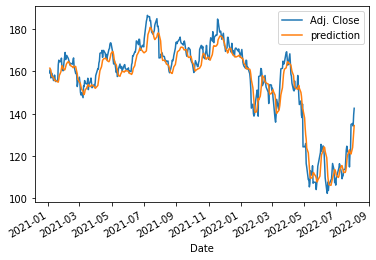

In [90]:
def GRU_model(X_train, y_train, X_test, sc):
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU
    from tensorflow.keras.optimizers import SGD
    
    # The GRU architecture
    my_GRU_model = Sequential()
    # First GRU layer with Dropout regularisation
    my_GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_GRU_model.add(GRU(units=50, activation='tanh'))
    my_GRU_model.add(Dense(units=2))

    # Compiling the RNN
    my_GRU_model.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
    # Fitting to the training set
    my_GRU_model.fit(X_train,y_train,epochs=50,batch_size=150, verbose=0)

    GRU_prediction = my_GRU_model.predict(X_test)
    GRU_prediction = sc.inverse_transform(GRU_prediction)

    return my_GRU_model, GRU_prediction

my_GRU_model, GRU_prediction = GRU_model(X_train, y_train, X_test, sc)
GRU_prediction[1:10]
actual_pred_plot(GRU_prediction)  

In [91]:
GRU_prediction[1:10]

array([[161.13335, 161.49463],
       [160.29678, 160.64879],
       [158.7248 , 159.05324],
       [157.63622, 157.98056],
       [157.14156, 157.52959],
       [156.48956, 156.84511],
       [155.68842, 156.04716],
       [155.82393, 156.20377],
       [155.6031 , 155.98332]], dtype=float32)

In [92]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, GRU
from tensorflow.keras.optimizers import SGD

In [93]:
# The GRU architecture
my_GRU_model = Sequential()
# First GRU layer with Dropout regularisation
my_GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
my_GRU_model.add(GRU(units=50, activation='tanh'))
my_GRU_model.add(Dense(units=2))

# Compiling the RNN
my_GRU_model.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [94]:
# Fitting to the training set
my_GRU_model.fit(X_train,y_train,epochs=100,batch_size=150, verbose=1)

Epoch 1/100
14/14 [==============================] - 6s 10ms/step - loss: 0.0903
Epoch 2/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0559
Epoch 3/100
14/14 [==============================] - 0s 13ms/step - loss: 0.0366
Epoch 4/100
14/14 [==============================] - 0s 12ms/step - loss: 0.0244
Epoch 5/100
14/14 [==============================] - 0s 13ms/step - loss: 0.0153
Epoch 6/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0088
Epoch 7/100
14/14 [==============================] - 0s 13ms/step - loss: 0.0046
Epoch 8/100
14/14 [==============================] - 0s 12ms/step - loss: 0.0022
Epoch 9/100
14/14 [==============================] - 0s 10ms/step - loss: 0.0010
Epoch 10/100
14/14 [==============================] - 0s 10ms/step - loss: 5.0536e-04
Epoch 11/100
14/14 [==============================] - 0s 11ms/step - loss: 2.9024e-04
Epoch 12/100
14/14 [==============================] - 0s 12ms/step - loss: 2.1076e-04
Epoch 13/100


In [95]:
GRU_prediction = my_GRU_model.predict(X_test)
GRU_prediction = sc.inverse_transform(GRU_prediction)

In [96]:
len(GRU_prediction)

400